<a href="https://colab.research.google.com/github/santhoshraghu/-Task-3_Exploratory_Data_Analysis-_Retail/blob/main/EDM_MLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data:

In [3]:
df=pd.read_csv("edmdf.csv")
#df=pd.read_csv(r"C:\Users\Santhosh Raghu\edmdata.csv",encoding='latin-1')
df.head()

,No_of_Experiments,Pc(A),PT(µs),Gv(V),Dielectric_Fluids,MRR (mg/min),SR (µm)
0,1,5,14,30,SDF,6.80,5.079
1,2,2,20,50,C-0.5,10.74,3.873
2,3,2,14,10,C-0.5,12.26,3.105
3,4,8,14,10,C-1.5,7.50,4.810
4,5,8,8,50,SDF,4.59,4.130


## EDM:

### Data study:

In [4]:
df.shape

(32, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_of_Experiments  32 non-null     int64  
 1   Pc(A)              32 non-null     int64  
 2   PT(µs)             32 non-null     int64  
 3   Gv(V)              32 non-null     int64  
 4   Dielectric_Fluids  32 non-null     object 
 5   MRR (mg/min)       32 non-null     float64
 6   SR (µm)            32 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.9+ KB


In [6]:
df.describe()

,No_of_Experiments,Pc(A),PT(µs),Gv(V),MRR (mg/min),SR (µm)
count,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000
mean,16.500000,5.46875,15.500000,31.250000,8.930688,3.982844
std,9.380832,2.42280,4.572005,15.187006,5.803524,1.093715
min,1.000000,2.00000,8.000000,10.000000,3.300000,1.978000
25%,8.750000,4.25000,14.000000,25.000000,5.655000,3.099500
50%,16.500000,5.00000,14.000000,30.000000,7.225000,3.892500
75%,24.250000,8.00000,20.000000,50.000000,10.862500,4.818000
max,32.000000,8.00000,20.000000,50.000000,33.720000,6.861000


In [7]:
df.corr()

,No_of_Experiments,Pc(A),PT(µs),Gv(V),MRR (mg/min),SR (µm)
No_of_Experiments,1.000000,0.048966,0.216612,-0.208311,0.139284,-0.186697
Pc(A),0.048966,1.000000,0.039314,-0.174243,0.211946,0.196911
PT(µs),0.216612,0.039314,1.000000,-0.195123,0.287010,0.001442
Gv(V),-0.208311,-0.174243,-0.195123,1.000000,-0.357879,-0.391390
MRR (mg/min),0.139284,0.211946,0.287010,-0.357879,1.000000,-0.394803
SR (µm),-0.186697,0.196911,0.001442,-0.391390,-0.394803,1.000000


In [8]:
df.isnull().sum()

No_of_Experiments    0
Pc(A)                0
PT(µs)               0
Gv(V)                0
Dielectric_Fluids    0
MRR (mg/min)         0
SR (µm)              0
dtype: int64

In [9]:
print(np.unique(df['Dielectric_Fluids']))

['C-0.5' 'C-1.0' 'C-1.5' 'SD' 'SDF' 'SDFF']


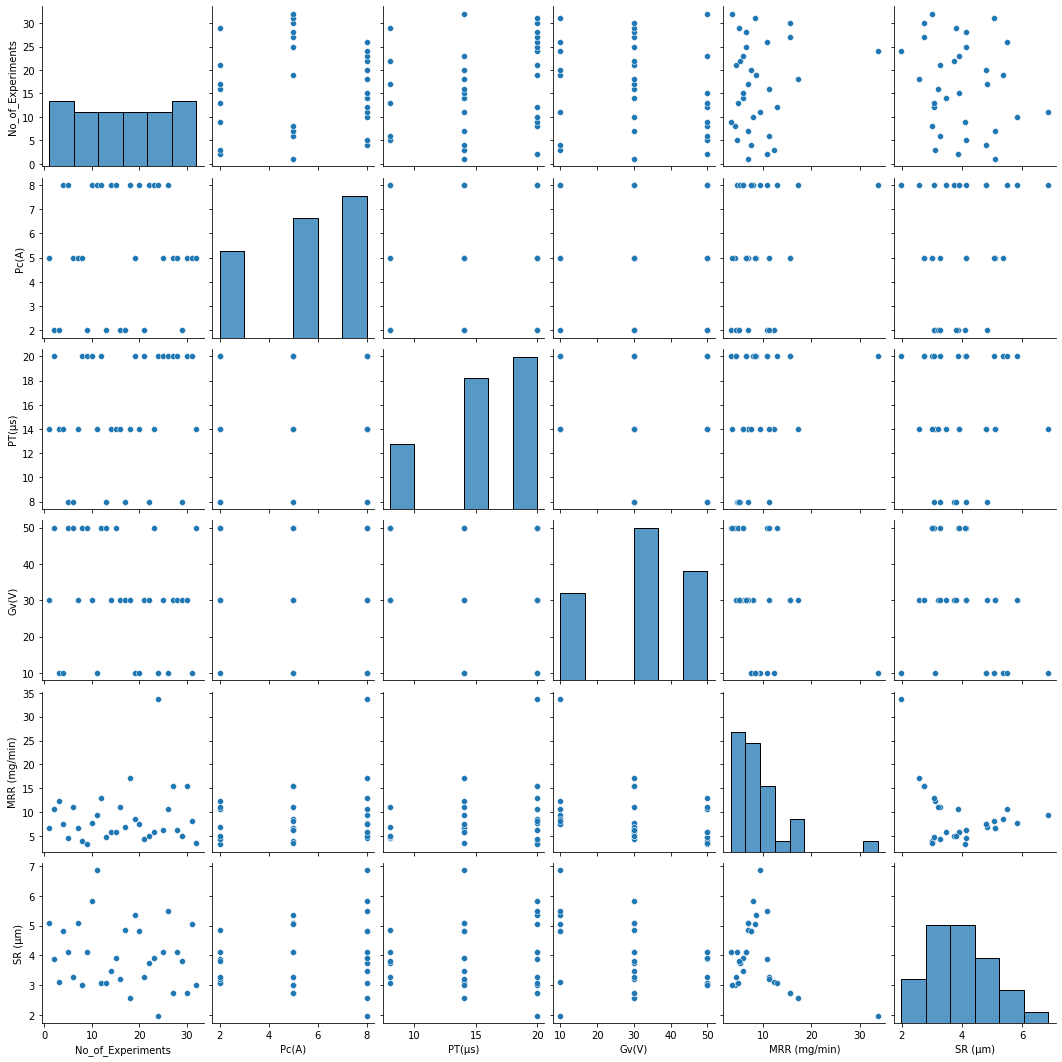

In [10]:
sns.pairplot(df)

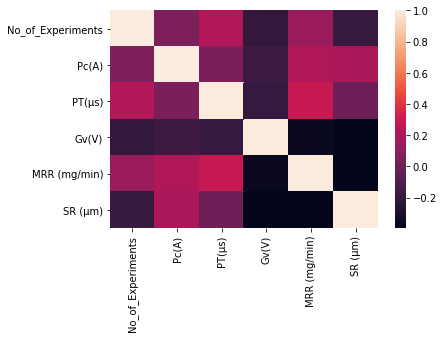

In [11]:
sns.heatmap(df.corr())

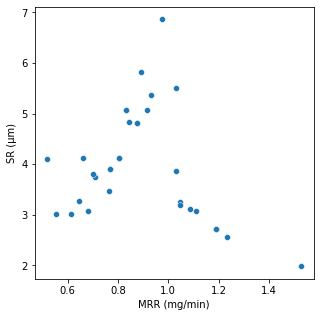

In [57]:
sns.scatterplot(x='MRR (mg/min)',y='SR (µm)',data=df)

## Encoding categorical data ( Dielectric Fluid ) : using replace value method

In [14]:
#replace_map = {'Dielectric_Fluids': {'C-0.5': 1, 'C-1.0': 2, 'C-1.5': 3, 'SD': 4,'SDF': 5, 'SDFF': 6}}
dummy_dielec=pd.get_dummies(df['Dielectric_Fluids'],drop_first=True)

In [15]:
df=pd.concat([df,dummy_dielec],axis=1)

In [16]:
df.head()

,No_of_Experiments,Pc(A),PT(µs),Gv(V),Dielectric_Fluids,MRR (mg/min),SR (µm),C-1.0,C-1.5,SD,SDF,SDFF
0,1,5,14,30,SDF,6.80,5.079,0,0,0,1,0
1,2,2,20,50,C-0.5,10.74,3.873,0,0,0,0,0
2,3,2,14,10,C-0.5,12.26,3.105,0,0,0,0,0
3,4,8,14,10,C-1.5,7.50,4.810,0,1,0,0,0
4,5,8,8,50,SDF,4.59,4.130,0,0,0,1,0


In [17]:
df = df.drop(['Dielectric_Fluids'], axis = 1)
df.head(2)

,No_of_Experiments,Pc(A),PT(µs),Gv(V),MRR (mg/min),SR (µm),C-1.0,C-1.5,SD,SDF,SDFF
0,1,5,14,30,6.80,5.079,0,0,0,1,0
1,2,2,20,50,10.74,3.873,0,0,0,0,0


In [ ]:
#labels = df['Dielectric_Fluids'].astype('category').cat.categories.tolist()
#replace_map_comp = {'Dielectric_Fluids' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [ ]:
#dff=df.copy()

In [ ]:
#dff.replace(replace_map_comp, inplace=True)
#print(dff.head())

In [18]:
df.dtypes

No_of_Experiments      int64
Pc(A)                  int64
PT(µs)                 int64
Gv(V)                  int64
MRR (mg/min)         float64
SR (µm)              float64
C-1.0                  uint8
C-1.5                  uint8
SD                     uint8
SDF                    uint8
SDFF                   uint8
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-0.3004685820375281

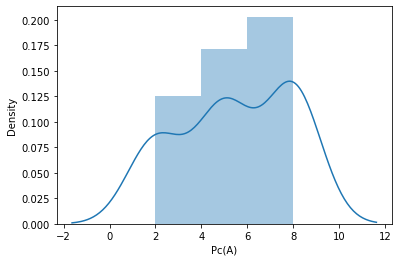

In [19]:
sns.distplot(df['Pc(A)'])
df['Pc(A)'].skew()

-0.46660787401551473

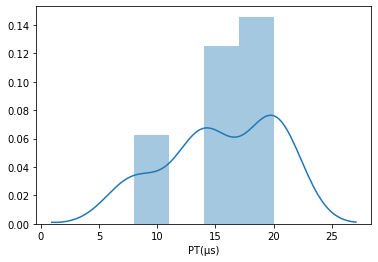

In [ ]:
sns.distplot(df['PT(µs)'])
df['PT(µs)'].skew()

-0.106826690332802

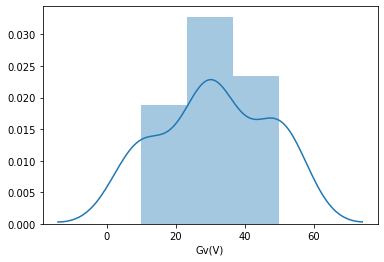

In [ ]:
sns.distplot(df['Gv(V)'])
df['Gv(V)'].skew()

2.73595113636345

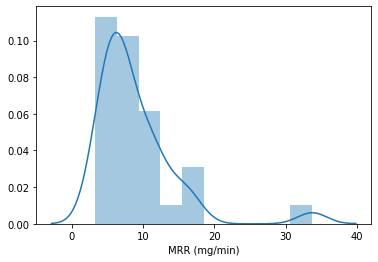

In [ ]:
sns.distplot(df['MRR (mg/min)'])
df['MRR (mg/min)'].skew()

0.5652211461840229

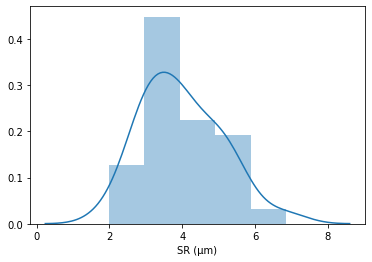

In [ ]:
sns.distplot(df['SR (µm)'])
df['SR (µm)'].skew()

# Applying tranformation to remove skewness:

In [20]:
df['MRR (mg/min)']=np.log10(df['MRR (mg/min)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.7077719539040359

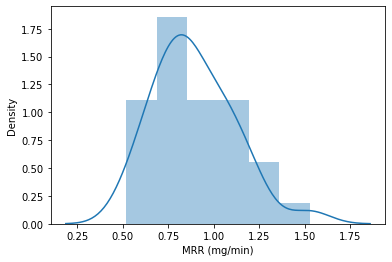

In [21]:
sns.distplot(df['MRR (mg/min)'])
df['MRR (mg/min)'].skew()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


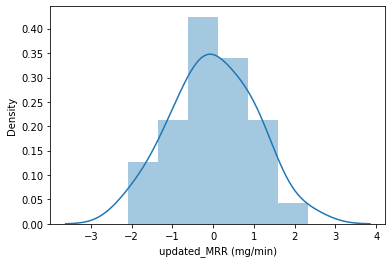

In [22]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()
df["updated_MRR (mg/min)"]=pt.fit_transform(df[['MRR (mg/min)']])
sns.distplot(df['updated_MRR (mg/min)'])

In [60]:
df.head(2)

,No_of_Experiments,Pc(A),PT(µs),Gv(V),MRR (mg/min),SR (µm),C-1.0,C-1.5,SD,SDF,SDFF,updated_MRR (mg/min)
0,1,5,14,30,0.832509,5.079,0,0,0,1,0,-0.155755
1,2,2,20,50,1.031004,3.873,0,0,0,0,0,0.739253


## Finding correlation between some of the input variables and output variable:

In [61]:
print(df['Pc(A)'].corr(df['updated_MRR (mg/min)']))
print(df['PT(µs)'].corr(df['updated_MRR (mg/min)']))
print(df['Gv(V)'].corr(df['updated_MRR (mg/min)']))
print(df['SR (µm)'].corr(df['updated_MRR (mg/min)']))
#print(df['Dielectric_Fluids'].corr(df['updated_MRR (mg/min)']))


#observation:
#correlation value can range from -1 to +1. if its negative value , we can conclude it is negetive value correlation and 
#if it is positive value we can conclude it has positive correlation.
#Also, values which are near to -1  and +1 is strongly correlated

0.22418189624059404
0.24962907330817766
-0.46236969298915237
-0.1435336783998832


# Outlier Checking :

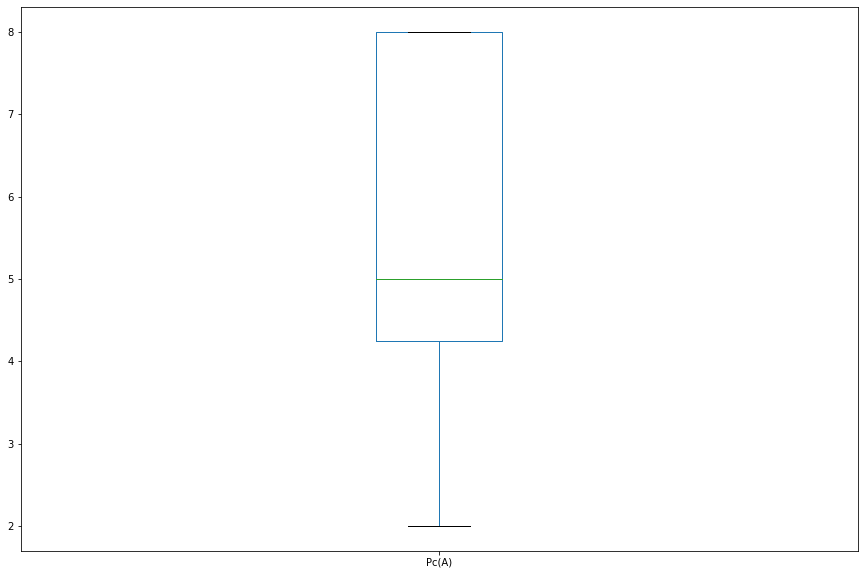

In [ ]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15,10))
df["Pc(A)"].plot(kind='box')
mpl.show()


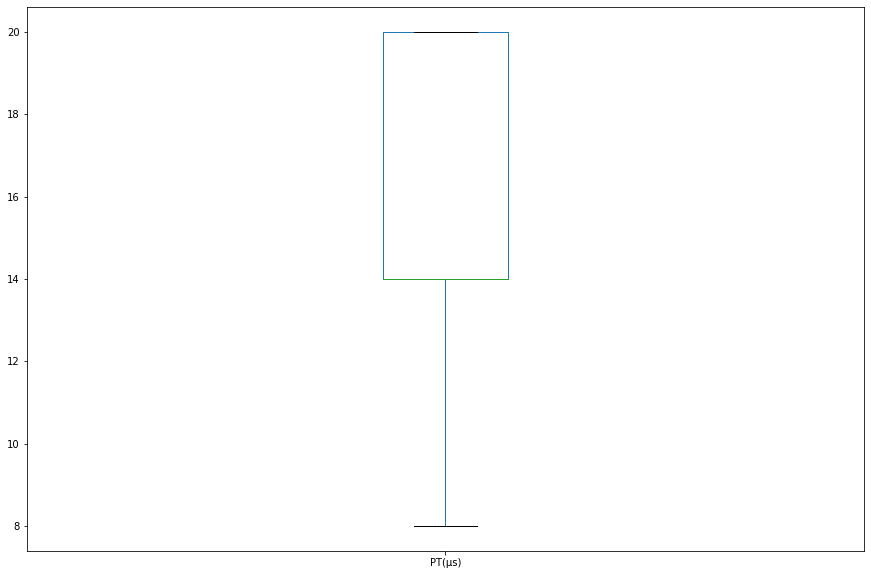

In [ ]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15,10))
df["PT(µs)"].plot(kind='box')
mpl.show()


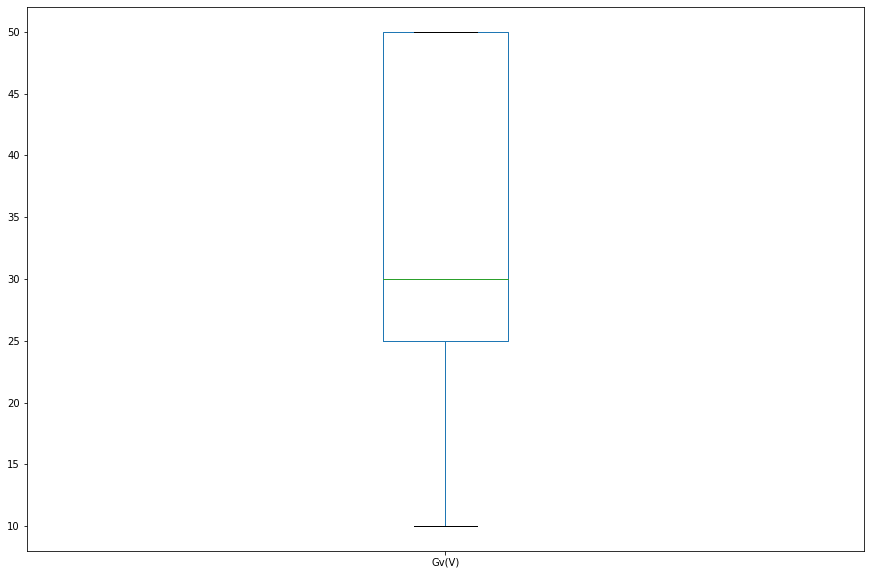

In [ ]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15,10))
df["Gv(V)"].plot(kind='box')
mpl.show()

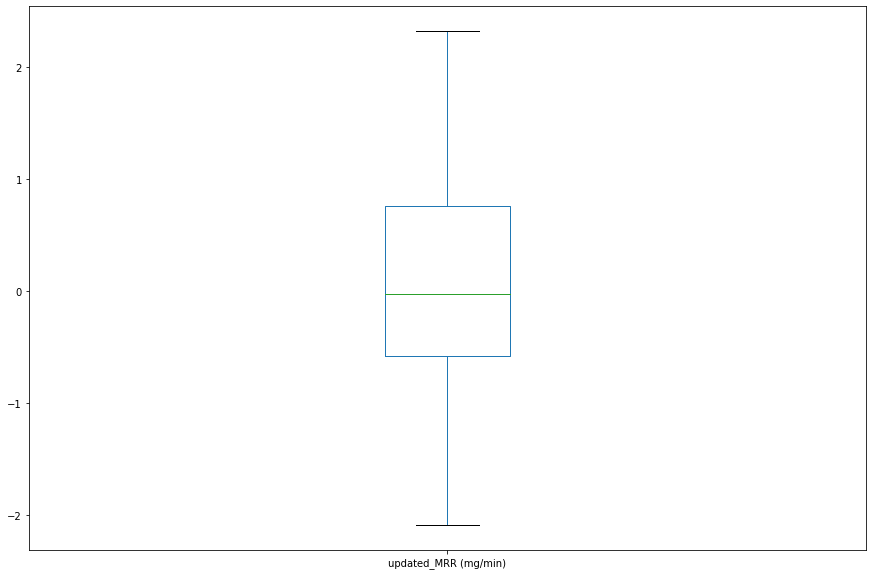

In [ ]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15,10))
df["updated_MRR (mg/min)"].plot(kind='box')
mpl.show()

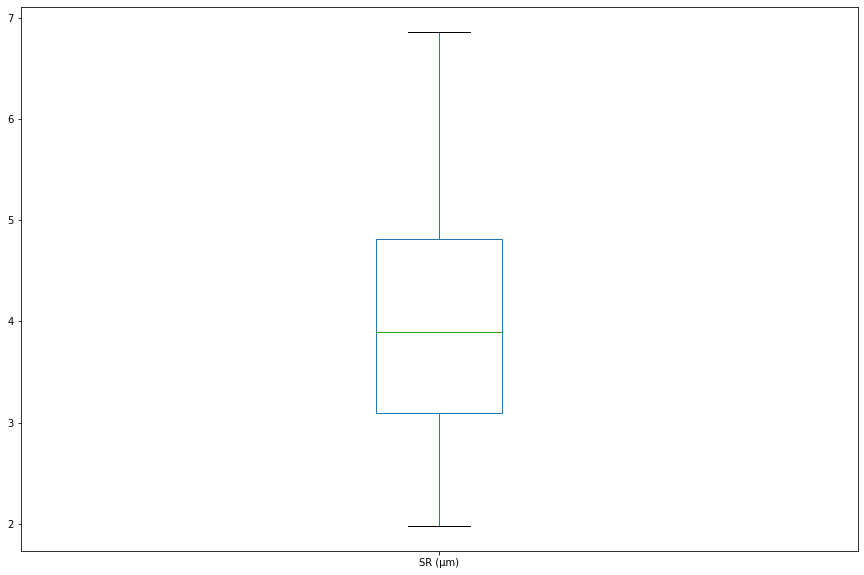

In [ ]:
import matplotlib.pyplot as mpl
mpl.figure(figsize=(15,10))
df["SR (µm)"].plot(kind='box')
mpl.show()

# Test Train Split :

In [ ]:
df.head()

,No_of_Experiments,Pc(A),PT(µs),Gv(V),MRR (mg/min),SR (µm),C-1.0,C-1.5,SD,SDF,SDFF,updated_MRR (mg/min)
0,1,5,14,30,0.832509,5.079,0,0,0,1,0,-0.155755
1,2,2,20,50,1.031004,3.873,0,0,0,0,0,0.739253
2,3,2,14,10,1.088490,3.105,0,0,0,0,0,0.964374
3,4,8,14,10,0.875061,4.810,0,1,0,0,0,0.053324
4,5,8,8,50,0.661813,4.130,0,0,0,1,0,-1.111058


In [62]:
X = df[['Pc(A)', 'PT(µs)', 'Gv(V)','C-1.0', 'C-1.5', 'SD', 'SDF', 'SDFF',]]
y = df['updated_MRR (mg/min)']



In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.3, random_state=0)

# XGBOOST REGRESSION

In [64]:
import xgboost as xg

In [65]:
xg_reg = xg.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

In [66]:
xg_reg.fit(X_train,Y_train)

[15:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [67]:
pred = xg_reg.predict(X_test)

In [68]:
from sklearn.metrics import mean_squared_error as mse
rmse = np.sqrt(mse(Y_test, pred))
print("RMSE: %f" % (rmse))

RMSE: 0.922530


In [72]:
xg_reg = xg.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[15:55:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


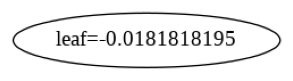

In [74]:
import matplotlib.pyplot as plt

xg.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

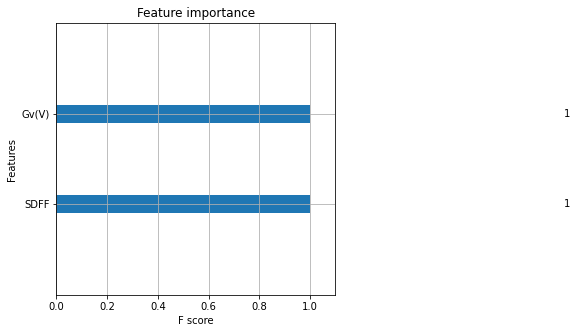

In [78]:
xg.plot_importance(xg_reg)

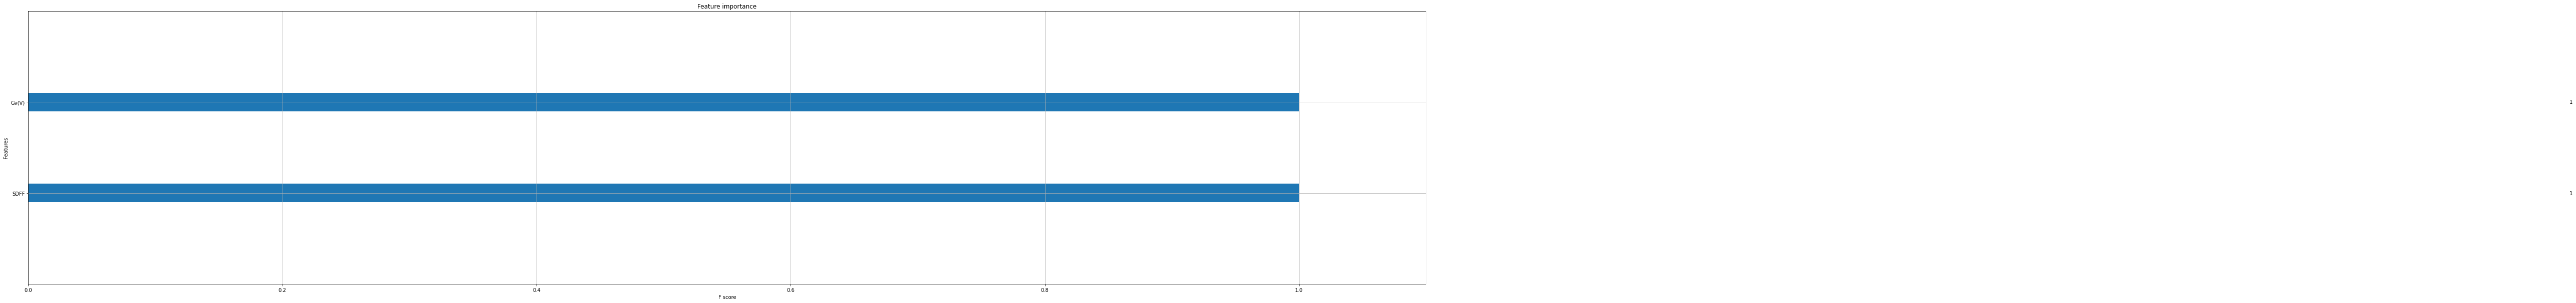

In [76]:
xg.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Regression algorithm ( multiple linear ):

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred= regressor.predict(X_test)

In [ ]:
regressor.intercept_

0.3761492554871633

In [ ]:
regressor.coef_

array([ 0.03937293,  0.04419107, -0.02595472, -1.29386653, -0.18440441,
       -0.56880213, -1.05506298,  0.        ])

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test,y_pred)
r_squared

-0.20339591128639256

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

1.0915800732994272

# Gradient boosting regressor:

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(X_train, Y_train)

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test,y_pred)
r_squared

-1.8986798169022032

In [ ]:
model.score(X_train,Y_train) #Return the coefficient of determination R2 of the prediction.

0.8762973589295301

In [ ]:
model.score(X_test,Y_test)

-1.8986798169022032

# Random forest regressor:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(Y_test,y_pred)
r_squared

-0.683685083269238

In [ ]:
model.score(X_train,Y_train)

0.7298526607788665

In [ ]:
model.score(X_test,Y_test)

-0.683685083269238

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

1.0915800732994272

## Polynomial regression:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=lin2.predict(X_test)

ValueError: shapes (10,8) and (495,) not aligned: 8 (dim 1) != 495 (dim 0)